### IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

### DATA LOADING

In [2]:
train = pd.read_csv(r'C:\Users\vardh\OneDrive\Desktop\Spaceship_titanic_dataset\train.csv', index_col="PassengerId")
test = pd.read_csv(r'C:\Users\vardh\OneDrive\Desktop\Spaceship_titanic_dataset\test.csv', index_col="PassengerId")

### DATA EXPLORATION

In [3]:
train.shape

(8693, 13)

In [4]:
test.shape

(4277, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Name          4183 non-null   object 
dtypes: float64(6), object(6)
memory usage: 434.4+ KB


In [7]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


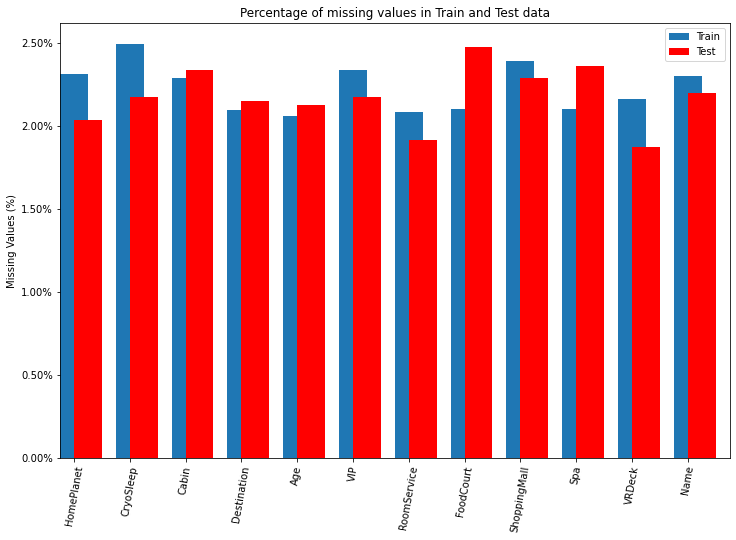

In [9]:
fig,ax = plt.subplots(1,1, figsize=(12,8))
(train.isnull().mean()*100).plot(kind='bar', ax=ax, align='center', width=.5)
(test.isnull().mean()*100).plot(kind='bar', ax=ax, align='edge',width=.5,color = 'red')
plt.legend(labels=['Train','Test'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.tick_params(axis='x', labelrotation=80)
ax.set_ylabel('Missing Values (%)')
ax.set_title('Percentage of missing values in Train and Test data');

In [10]:
cat_col = [col for col in train.columns if train[col].dtype == 'object' or train[col].dtype == 'bool' ]
num_col = [col for col in train.columns if train[col].dtype !='object']

print(f'categorical columns:', cat_col)
print(f'numeric columns:', num_col)

categorical columns: ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Transported']
numeric columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']


In [11]:
train['HomePlanet'].value_counts().sort_values(ascending=False)

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

C:\Users\vardh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


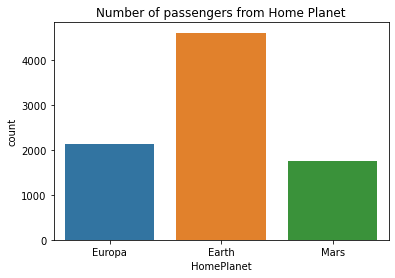

In [12]:
sns.countplot(train.HomePlanet)
plt.title('Number of passengers from Home Planet');

C:\Users\vardh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


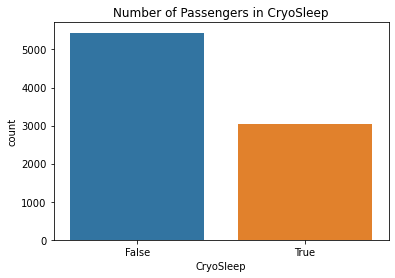

In [13]:
sns.countplot(train.CryoSleep)
plt.title('Number of Passengers in CryoSleep');

C:\Users\vardh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


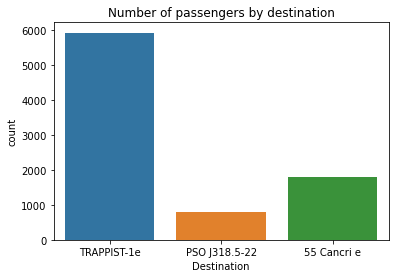

In [14]:
sns.countplot(train.Destination)
plt.title('Number of passengers by destination');

C:\Users\vardh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


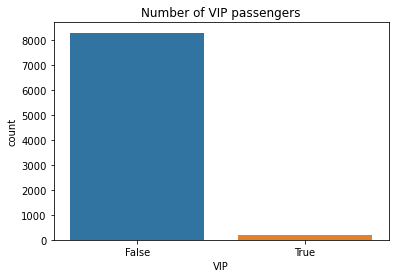

In [15]:
sns.countplot(train.VIP)
plt.title('Number of VIP passengers');

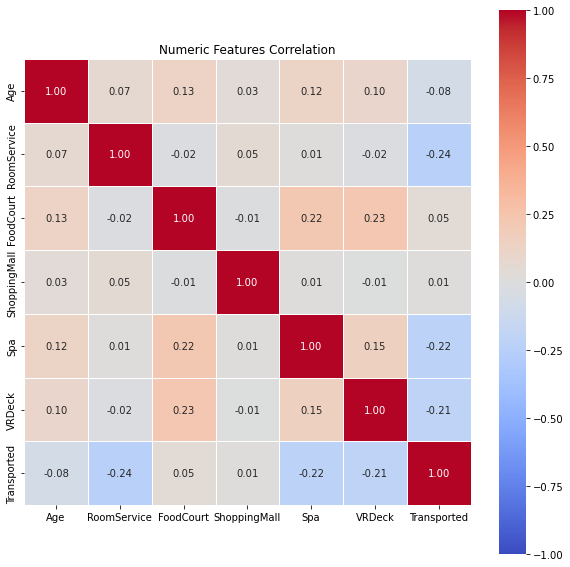

In [16]:
num_features = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported']

corr = train[num_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, square=True, fmt='.2f', vmin=-1, vmax=1, linewidths=0.5, cmap='coolwarm')
plt.title('Numeric Features Correlation');

### DATA PREPROCESSING

In [17]:
combined = pd.concat([train, test], axis = 0)

In [18]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0001_01 to 9277_01
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  object 
 2   Cabin         12671 non-null  object 
 3   Destination   12696 non-null  object 
 4   Age           12700 non-null  float64
 5   VIP           12674 non-null  object 
 6   RoomService   12707 non-null  float64
 7   FoodCourt     12681 non-null  float64
 8   ShoppingMall  12664 non-null  float64
 9   Spa           12686 non-null  float64
 10  VRDeck        12702 non-null  float64
 11  Name          12676 non-null  object 
 12  Transported   8693 non-null   object 
dtypes: float64(6), object(7)
memory usage: 1.4+ MB


In [19]:
combined.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### FILLING MISSING VALUES

In [20]:
combined['HomePlanet'].fillna('Undefined', inplace = True)
combined['CryoSleep'].fillna('Undefined', inplace = True)
combined['Destination'].fillna('Undefined', inplace = True)
combined['VIP'].fillna('Undefined', inplace = True)

In [21]:
combined['Age'].fillna(combined['Age'].mean(), inplace = True)
combined['RoomService'].fillna(combined['RoomService'].mean(), inplace = True)
combined['FoodCourt'].fillna(combined['FoodCourt'].mean(), inplace = True)
combined['ShoppingMall'].fillna(combined['ShoppingMall'].mean(), inplace = True)
combined['Spa'].fillna(combined['Spa'].mean(), inplace = True)
combined['VRDeck'].fillna(combined['VRDeck'].mean(), inplace=True)
combined['Name'].fillna('UndefName UndefFamName', inplace = True)

### FEATURE ENGINEERING

Creating a new feature called GroupSize by extracting the values from the Passenger_Id feature

In [22]:
combined['index'] = combined.index
combined[['ID']]=combined['index'].astype(str).str.split('_',expand=True)[[0]].astype(int)
combined['GroupSize']=combined.groupby(['ID'])['ID'].transform('count')

Creating new features by using the Age feature

In [23]:
combined['Child']=combined['Age'].apply(lambda x:1 if x<14 else 0)
combined['Young']=combined['Age'].apply(lambda x: 1 if x in range(14,27) else 0)
combined['Middle']=combined['Age'].apply(lambda x: 1 if x in range(28,41) else 0)
combined['Adult']=combined['Age'].apply(lambda x: 1 if x in range(42,63) else 0)
combined['Old']=combined['Age'].apply(lambda x: 1 if x>64 else 0)

Creating new feature FamilyName by extracting the values from the Name feature

In [24]:
combined['FamilyName']=combined['Name'].str.split(' ', expand=True)[1]
familySize = combined.pivot_table(columns=['FamilyName'], aggfunc='size')
familySize = familySize.reset_index()
familySize.columns = ['FamilyName', 'Size']

def findID(datafile):
    return familySize['Size'][np.where(familySize['FamilyName'] == datafile['FamilyName'])[0][0]]

combined['FamilyAmount'] = combined.apply(findID, axis = 1)
del familySize

Splitting the Cabin feature into Deck, Number, Side features

In [25]:
cabin_combined = combined['Cabin'].str.split('/', expand = True)
cabin_combined.columns = ['Deck', 'Number', 'Side']

combined['Deck'] = cabin_combined['Deck']
combined['Number'] = pd.to_numeric(cabin_combined['Number'], errors='coerce')
combined['Side'] = cabin_combined['Side']

combined['Deck'].fillna('Undefined', inplace = True)
combined['Number'].fillna(combined['Number'].mean(), inplace = True)
combined['Side'].fillna('Undefined', inplace = True)

Combining RoomService, Spa, VRDeck features into single private activity feature
Combining FoodCourt, SHoppingMall features into a single public activity feature
Combining all the activities into a single Category and assigning the numerical values depending upon the values  

In [26]:
combined["PrivateAct"] = combined["RoomService"] + combined["Spa"] + combined["VRDeck"]
combined["PublicAct"] = combined["FoodCourt"] + combined["ShoppingMall"]
combined["Activities"] = combined["PrivateAct"] + combined["PublicAct"]

combined["ActCat"] = np.where(((combined["PrivateAct"] > 0) & (combined["PublicAct"] > 0)), "Both", np.where(combined["PrivateAct"] > 0, "Private", np.where(combined["PublicAct"] > 0, "Public", "No Activity")))

In [27]:
combined.drop(['index', 'FamilyName', 'Cabin', 'Name'], inplace=True, axis=1)

Encoding

In [28]:
df1 = pd.get_dummies(combined, columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side', 'ActCat','Child','Young','Middle','Adult','Old'])
df1

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,ID,GroupSize,FamilyAmount,...,Child_0,Child_1,Young_0,Young_1,Middle_0,Middle_1,Adult_0,Adult_1,Old_0,Old_1
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,39.000000,0.0,0.0,0.0,0.0,0.0,False,1,1,3,...,1,0,1,0,0,1,1,0,1,0
0002_01,24.000000,109.0,9.0,25.0,549.0,44.0,True,2,1,4,...,1,0,0,1,1,0,1,0,1,0
0003_01,58.000000,43.0,3576.0,0.0,6715.0,49.0,False,3,2,7,...,1,0,1,0,1,0,0,1,1,0
0003_02,33.000000,0.0,1283.0,371.0,3329.0,193.0,False,3,2,7,...,1,0,1,0,0,1,1,0,1,0
0004_01,16.000000,303.0,70.0,151.0,565.0,2.0,True,4,1,9,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,34.000000,0.0,0.0,0.0,0.0,0.0,NaN,9266,2,10,...,1,0,1,0,0,1,1,0,1,0
9269_01,42.000000,0.0,847.0,17.0,10.0,144.0,NaN,9269,1,6,...,1,0,1,0,1,0,0,1,1,0
9271_01,28.771969,0.0,0.0,0.0,0.0,0.0,NaN,9271,1,4,...,1,0,1,0,1,0,1,0,1,0


Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Number','PrivateAct','PublicAct','Activities', 'GroupSize', 'ID', 'FamilyAmount']
df1.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,ID,GroupSize,FamilyAmount,Number,...,Child_0,Child_1,Young_0,Young_1,Middle_0,Middle_1,Adult_0,Adult_1,Old_0,Old_1
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,...,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482,4635.337471,2.022976,13.724287,603.601926,...,0.893909,0.106091,0.621049,0.378951,0.733076,0.266924,0.835235,0.164765,0.987587,0.012413
std,14.236710,640.996685,1566.618306,583.550067,1117.835494,1167.840416,2685.904299,1.577102,42.825192,506.945095,...,0.307966,0.307966,0.485145,0.485145,0.442369,0.442369,0.370982,0.370982,0.110725,0.110725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2306.250000,1.000000,5.000000,175.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4632.000000,1.000000,7.000000,452.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,37.000000,79.000000,126.000000,47.000000,87.000000,64.000000,6924.750000,2.000000,10.000000,992.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9280.000000,8.000000,294.000000,1894.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df2 = df1.copy()
scaler = StandardScaler()
df2[num_cols] = scaler.fit_transform(df2[num_cols])
df2.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,ID,GroupSize,FamilyAmount,Number,...,Child_0,Child_1,Young_0,Young_1,Middle_0,Middle_1,Adult_0,Adult_1,Old_0,Old_1
count,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04,...,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,3.037748e-16,-3.904612e-16,4.268752e-16,-6.058976e-16,-4.094386e-16,-6.209374e-17,-1.463063e-16,4.924871e-16,6.212049e-17,-6.800180e-16,...,0.893909,0.106091,0.621049,0.378951,0.733076,0.266924,0.835235,0.164765,0.987587,0.012413
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,...,0.307966,0.307966,0.485145,0.485145,0.442369,0.442369,0.370982,0.370982,0.110725,0.110725
min,-2.021048e+00,-3.477498e-01,-2.885062e-01,-2.997391e-01,-2.759698e-01,-2.627082e-01,-1.725496e+00,-6.486680e-01,-2.971330e-01,-1.190711e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.161751e-01,-3.477498e-01,-2.885062e-01,-2.997391e-01,-2.759698e-01,-2.627082e-01,-8.671855e-01,-6.486680e-01,-2.037264e-01,-8.454928e-01,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,-1.244695e-01,-3.477498e-01,-2.885062e-01,-2.997391e-01,-2.759698e-01,-2.627082e-01,-1.242635e-03,-6.486680e-01,-1.570231e-01,-2.990615e-01,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,5.779670e-01,-2.244994e-01,-2.080751e-01,-2.191945e-01,-1.981378e-01,-2.079041e-01,8.524134e-01,-1.456912e-02,-8.696821e-02,7.661837e-01,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,3.528201e+00,2.200424e+01,1.874239e+01,3.995886e+01,1.977069e+01,2.040273e+01,1.729340e+00,3.790024e+00,6.544898e+00,2.545538e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
train = df2[0:len(train)] 
test  = df2[len(train):]  
Y = train['Transported'].astype(float)
X = train.drop(['Transported'], axis = 1)
Xtest = test.drop(['Transported'], axis = 1)

### MODEL TRAINING

In [33]:
kfold = KFold(n_splits=2, shuffle=True, random_state = 21)

valScores = []
trainScores = []
estimators =[]

for i, j in kfold.split(X):
    X_tr, X_val = X.iloc[i], X.iloc[j]
    Y_tr, Y_val = Y.iloc[i], Y.iloc[j]
    
    model = GridSearchCV(CatBoostClassifier(),param_grid={'iterations': range(100,2000,200), 'eval_metric': ['Accuracy'],'verbose':[0]},n_jobs=-1,cv=5)
    model.fit(X_tr, Y_tr)
    Y_pred = model.predict(X_val)
    val_Score = accuracy_score(Y_val, Y_pred)
    
    tr_Pred = model.predict(X_tr)
    tr_Score = accuracy_score(Y_tr, tr_Pred)
    
    model.fit(X, Y)
    
    valScores.append(val_Score)
    trainScores.append(tr_Score)
    estimators.append(model)

In [34]:
np.mean(trainScores)

0.9056712020106645

In [35]:
np.mean(valScores)

0.8088112086441385

In [36]:
valScores

[0.8129744651483782, 0.8046479521398987]

In [37]:
trainScores

[0.9054302807179015, 0.9059121233034276]

In [38]:
submission_df = pd.read_csv(r'C:\Users\vardh\OneDrive\Desktop\Spaceship_titanic_dataset\sample_submission.csv', index_col = 'PassengerId')
submission_df['Transported'] = 0
submission_df['PROB_SUM_1'] = 0
submission_df['PROB_SUM_2'] = 0

for i in range(len(estimators)):
    result = estimators[i].predict_proba(Xtest)
    submission_df['PROB_SUM_1'] += result[:,0]
    submission_df['PROB_SUM_2'] += result[:,1]

submission_df["TOTAL_PROB_SUM"] = submission_df['PROB_SUM_1'] + submission_df['PROB_SUM_2']
submission_df['AVG_PROB'] = submission_df['PROB_SUM_2'] / len(estimators)

In [39]:
submission_df['Transported'] = submission_df['AVG_PROB'].apply(lambda x:1 if x>=0.5 else 0).astype(bool)
submission_df.drop(['PROB_SUM_1','PROB_SUM_2','TOTAL_PROB_SUM','AVG_PROB'],inplace=True, axis=1)

In [40]:
submission_df.to_csv(r'C:\Users\vardh\OneDrive\Desktop\Spaceship_titanic_submissions\submission_final.csv')